# Individuell uppgift – Hälsostudie

## Del 1 – Grundläggande analys och statistik

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.health import HealthAnalyser

analyser = HealthAnalyser("data/health_study_dataset.csv", clean=True)

In [6]:
per_gender = analyser.summery_of_csv_per_gender()
per_gender

age                                height                          \
          mean median        std min max        mean median       std    min   
sex                                                                            
F    49.868486   50.0  14.485542  18  90  165.103474  165.2  6.853727  144.4   
M    48.977330   49.0  14.521388  18  90  178.696977  178.6  7.276071  157.6   

            ... systolic_bp                                 cholesterol  \
       max  ...        mean median        std    min    max        mean   
sex         ...                                                           
F    187.0  ...  148.130025  148.4  13.179834  106.8  185.9    4.889926   
M    200.4  ...  150.243073  150.3  12.314155  120.4  184.2    4.968967   

                                  
    median       std   min   max  
sex                               
F     4.91  0.846840  2.50  7.88  
M     5.00  0.849219  2.54  7.50  

[2 rows x 25 columns]

In [7]:
summery = analyser.summery_of_csv()

summery

,age,height,weight,systolic_bp,cholesterol
sum,39541.000000,137479.400000,58730.400000,119342.900000,3943.320000
mean,49.426250,171.849250,73.413000,149.178625,4.929150
median,50.000000,171.350000,73.200000,149.400000,4.970000
std,14.501118,9.804259,13.685059,12.793360,0.848413
min,18.000000,144.400000,33.700000,106.800000,2.500000
max,90.000000,200.400000,114.400000,185.900000,7.880000


In [8]:
smokers = analyser.smoker_per_gender()

smokers

,Total,Smokers
sex,,
F,403,116
M,397,97


# Smoker Per Gender (F = Female) (M = Male)

(<Figure size 600x500 with 1 Axes>,
 <Axes: title={'center': 'Smoker per Gender'}>)

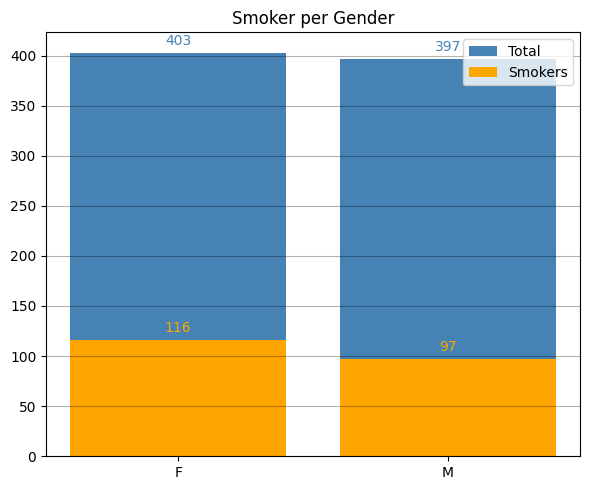

In [9]:
analyser.viz_smoker_per_gender()


# Amount Diseased

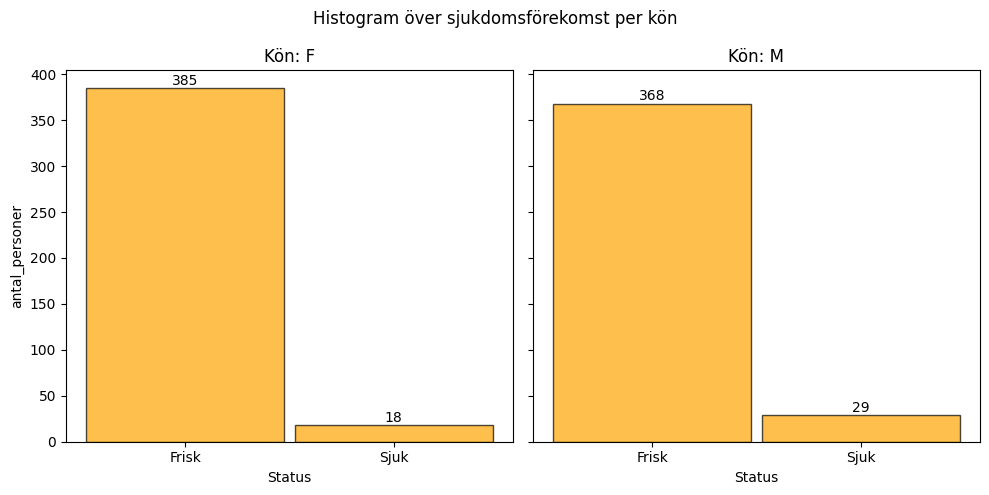

(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: title={'center': 'Kön: F'}, xlabel='Status', ylabel='antal_personer'>,
        <Axes: title={'center': 'Kön: M'}, xlabel='Status'>], dtype=object))

In [10]:
analyser.viz_disease_per_gender()

# Weight vs Height of Male vs Female (M = Male) (F = Female)

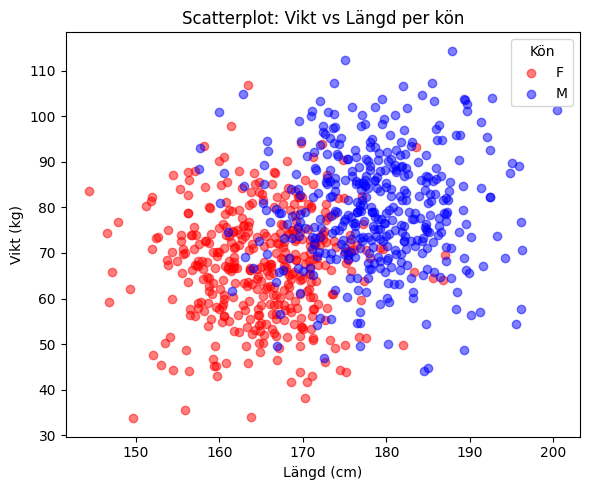

(<Figure size 600x500 with 1 Axes>,
 <Axes: title={'center': 'Scatterplot: Vikt vs Längd per kön'}, xlabel='Längd (cm)', ylabel='Vikt (kg)'>)

In [11]:
analyser.viz_weight_vs_height()

# 1000 Sims on disease

In [12]:

real_prob, sim_prob = analyser.sim_des(seed = 519, number_sims = 1000)

print("Andel sjukdom i datasetet:", real_prob)
print("Simulerade andel sjudom: ", sim_prob)
print("skillnaden: ", sim_prob - real_prob)


Andel sjukdom i datasetet: 0.05875
Simulerade andel sjudom:  0.06
skillnaden:  0.0012500000000000011


In [13]:
lower, upper = analyser.bootstrap_ci(subject_to_test_in_df="systolic_bp")
print(f"95% CI för medelvärdet av systolic_bp: [{lower:.2f}, {upper:.2f}]")


95% CI för medelvärdet av systolic_bp: [148.27, 150.05]


In [14]:
t_stat, p_value = analyser.smoker_systolic_bp_correlation_test()

print("t-Statistics:", t_stat)
print("p-value (one-sided):", p_value)

if p_value < 0.05:
    print("Resultat: Vi kan förkasta H0 - rökare har signifikant högre blodtryck")
else:
    print("Resultat: vi kan inte förkasta H0 - ingen säker skillnad")

t-Statistics: 0.4503433193393224
p-value (one-sided): 0.3263669371699499
Resultat: vi kan inte förkasta H0 - ingen säker skillnad


In [4]:
reg = analyser.regression_bp()
print(f"Koefficienter age: {reg["age"]} weight: {reg["weight"]}")
print("Intercept:", reg["intercept"])
print("R^2:", reg["r2"])
print("n:", reg["n"])


Koefficienter age: 0.5389276325169825 weight: 0.17765752193267906
Intercept: 109.49908144566373
R^2: 0.4052560814611623
n: 800


## Linjär regression av Ålder och Vikt vs Systoliskt blodtryck.

- Koefficient för **Ålder:** ≈ 0.54 mmHg
- Koefficient för **Vikt:**   ≈ 0.18 mmHg
- Intercept: ≈ 109 mmHg
- R^2 ≈ 0.40 modellen förklarar ca 40 % av variationen. Det betyder att mer än hälften beror antagligen på annat. 

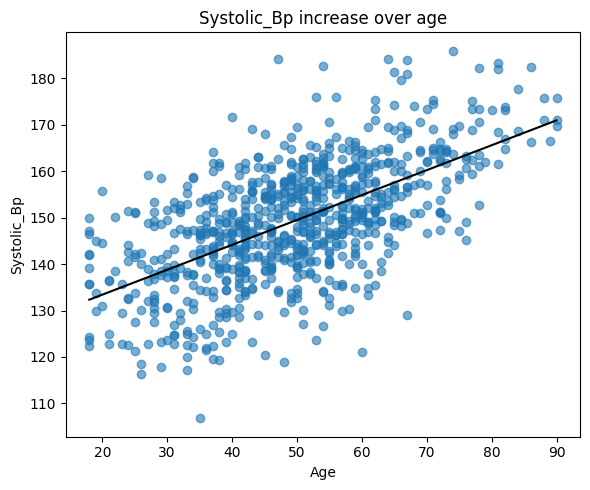

(<Figure size 600x500 with 1 Axes>,
 <Axes: title={'center': 'Systolic_Bp increase over age'}, xlabel='Age', ylabel='Systolic_Bp'>)

In [3]:
analyser.viz_bp_vs_age()